In [6]:
pip install tensorflow tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\tiwar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import glob
import numpy as np
from pathlib import Path

In [3]:
data_dir=Path(r'C:\Users\tiwar\New folder\RiceClassification\Data\Rice_Image_Dataset')

arborio=list(data_dir.glob('Arborio/*'))[:600]
basmati=list(data_dir.glob('Basmati/*'))[:600]
ipsala=list(data_dir.glob('Ipsala/*'))[:600]
jasmine=list(data_dir.glob('Jasmine/*'))[:600]
karacadag=list(data_dir.glob('Karacadag/*'))[:600]

In [4]:
df_images={
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag' : karacadag
}

df_labels = {
    'arborio': 0,
    'basmati': 1,
    'ipsala': 2,
    'jasmine': 3,
    'karacadag': 4 
}

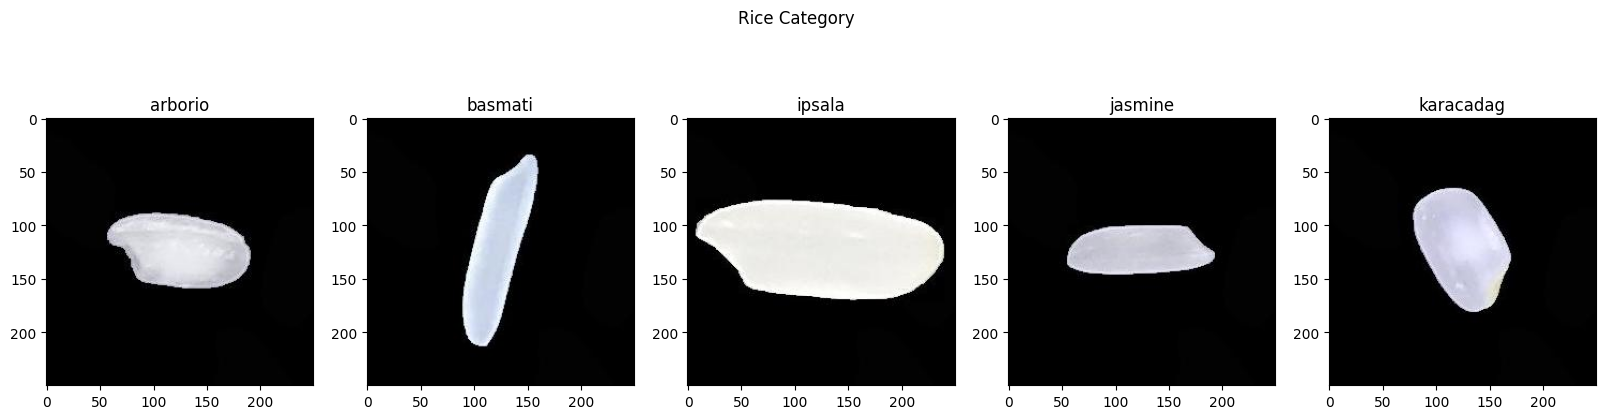

In [5]:
fig, ax=plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image=img.imread(arborio[0])
basmati_image=img.imread(basmati[0])
ipsala_image=img.imread(ipsala[0])
jasmine_image=img.imread(jasmine[0])
karacadag_image=img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [6]:
X, y= [], []
for label, images in df_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img, (224,224))
        X.append(resized_img)
        y.append(df_labels[label])

In [7]:
X=np.array(X)
X=X/255
y=np.array(y)

In [8]:
X_train, X_test_val, y_train, y_test_val=train_test_split(X, y)
X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val)